###  Assignment_16_NEURAL NETWORKS_TURBINE

### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.


Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

###  1. Introduction:
What are neural networks?
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.


###  import necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [9]:
!pip install tensorflow
!pip install keras

In [10]:
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

### import data

In [11]:
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


###  data understanding

In [12]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [13]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [14]:
df.shape

(15039, 11)

In [15]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [17]:
df[df.duplicated()].shape

(0, 11)

In [18]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


###  The features are not on the same scale. For example AP has a mean of 1013.19 and CO has a mean value of 1.97. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [20]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [21]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

C:\Users\sivas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


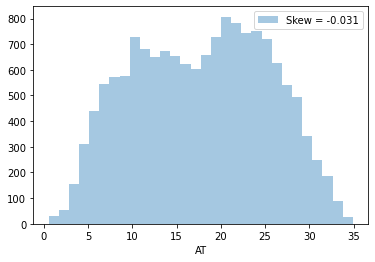

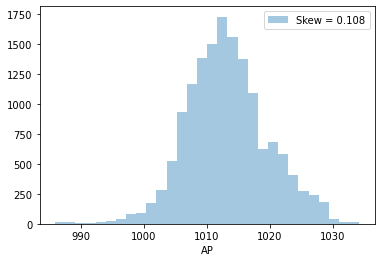

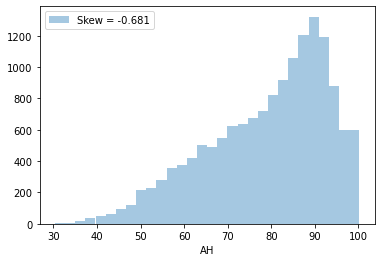

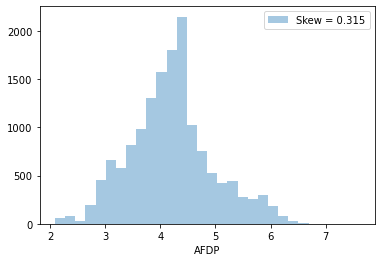

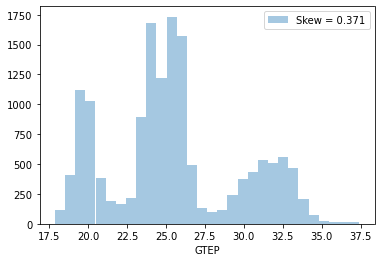

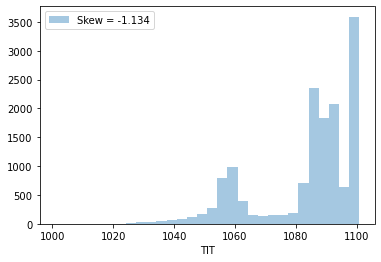

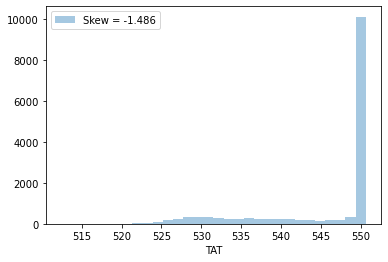

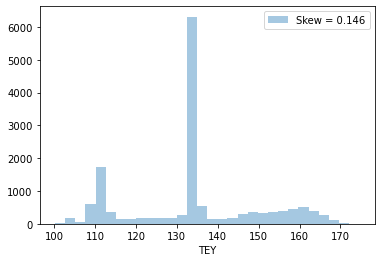

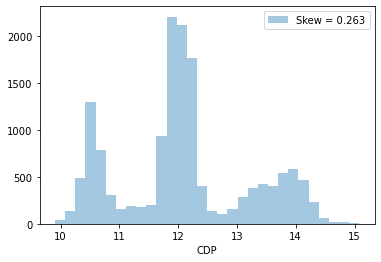

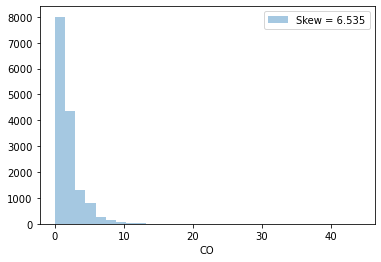

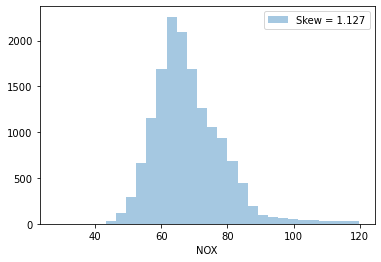

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#### Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.



In [23]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 1543 observations with more than 2 outliers


In [24]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

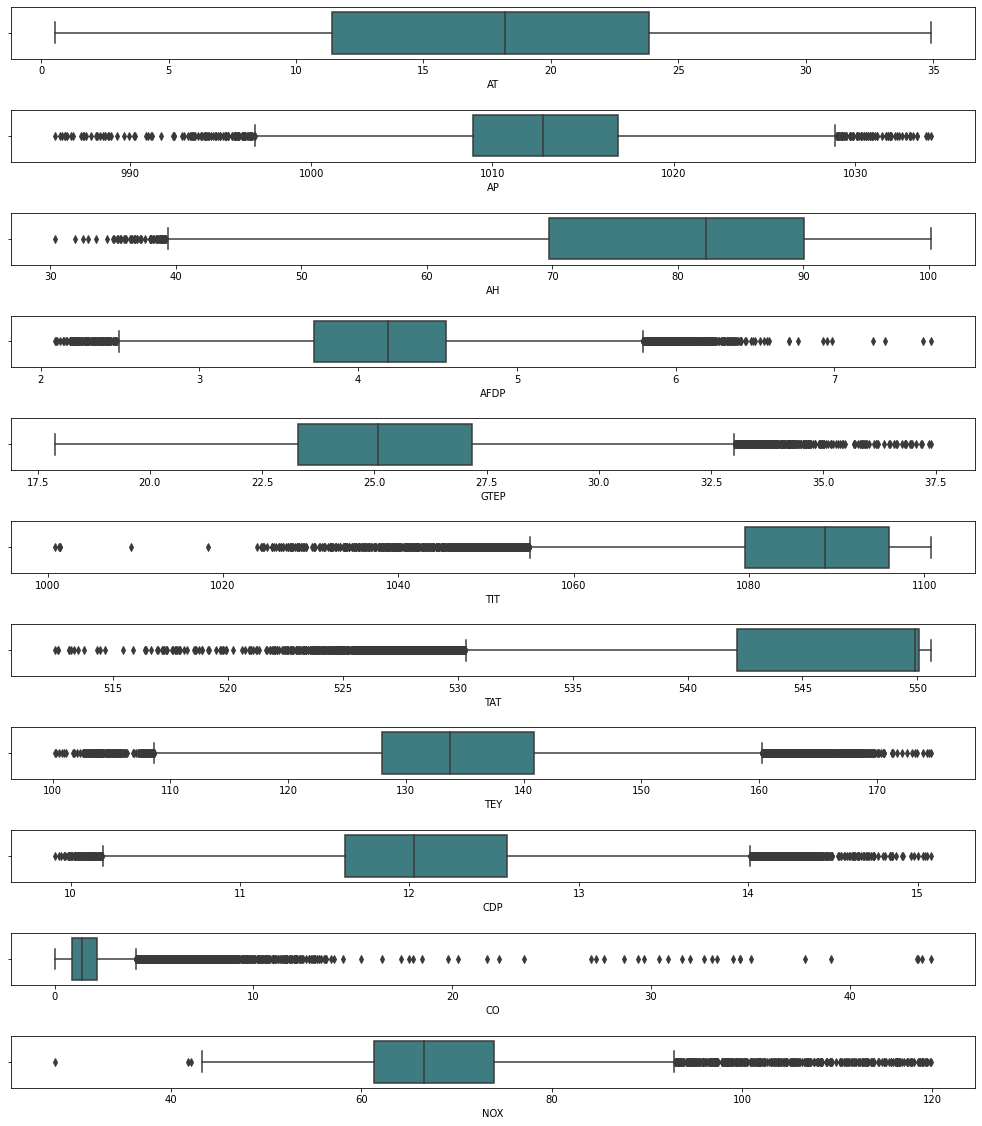

In [25]:
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

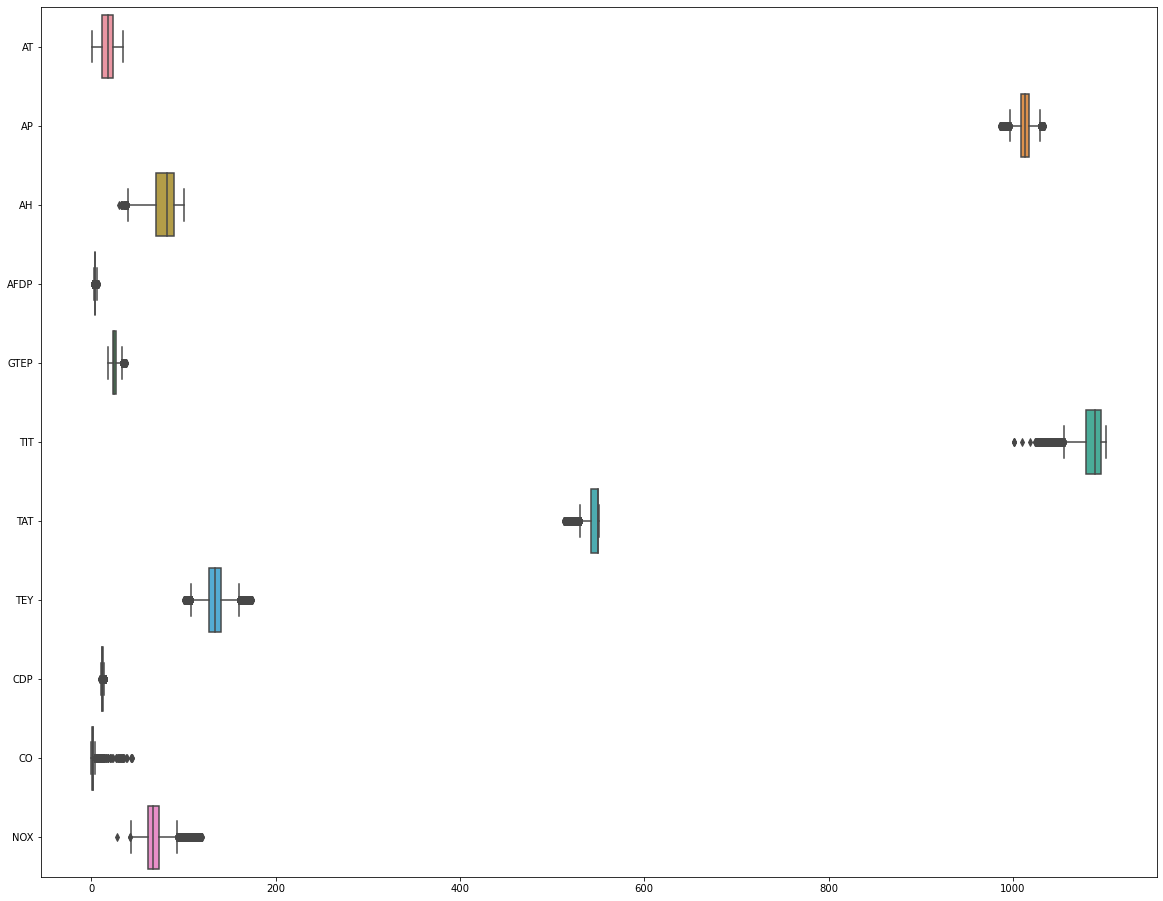

In [26]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")
plt.show()

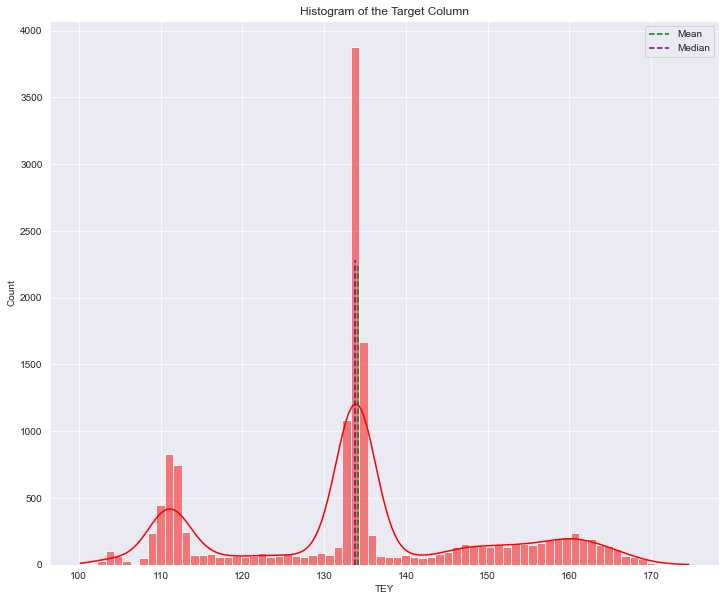

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")
plt.show()

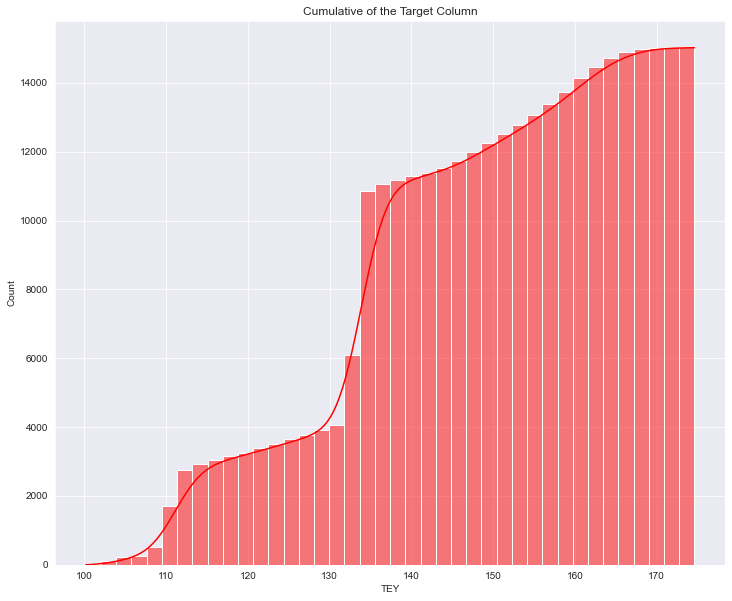

In [28]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")
plt.show()

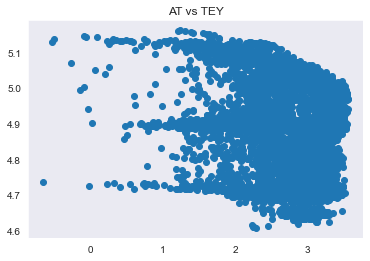

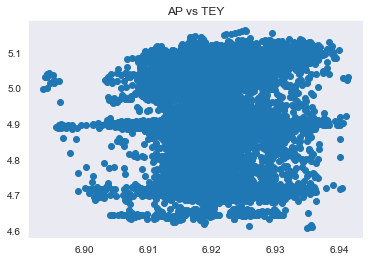

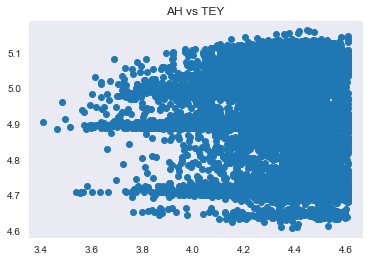

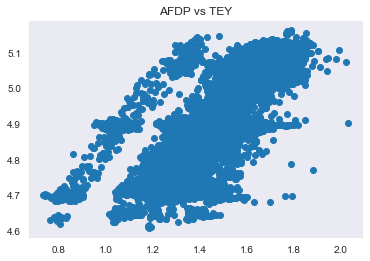

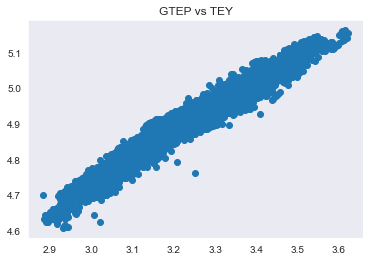

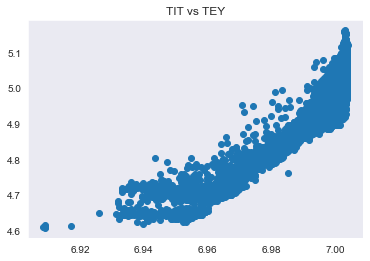

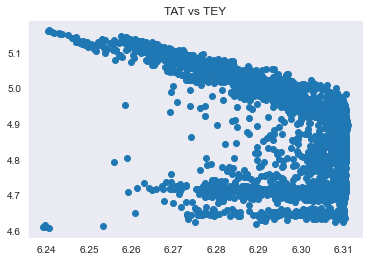

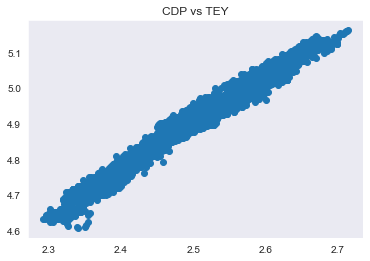

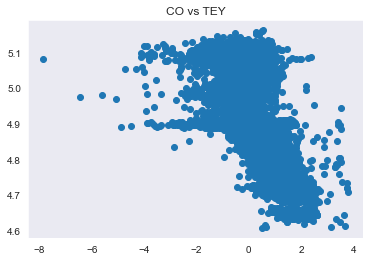

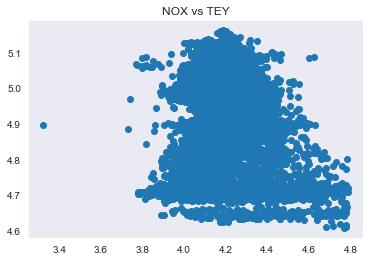

In [29]:
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

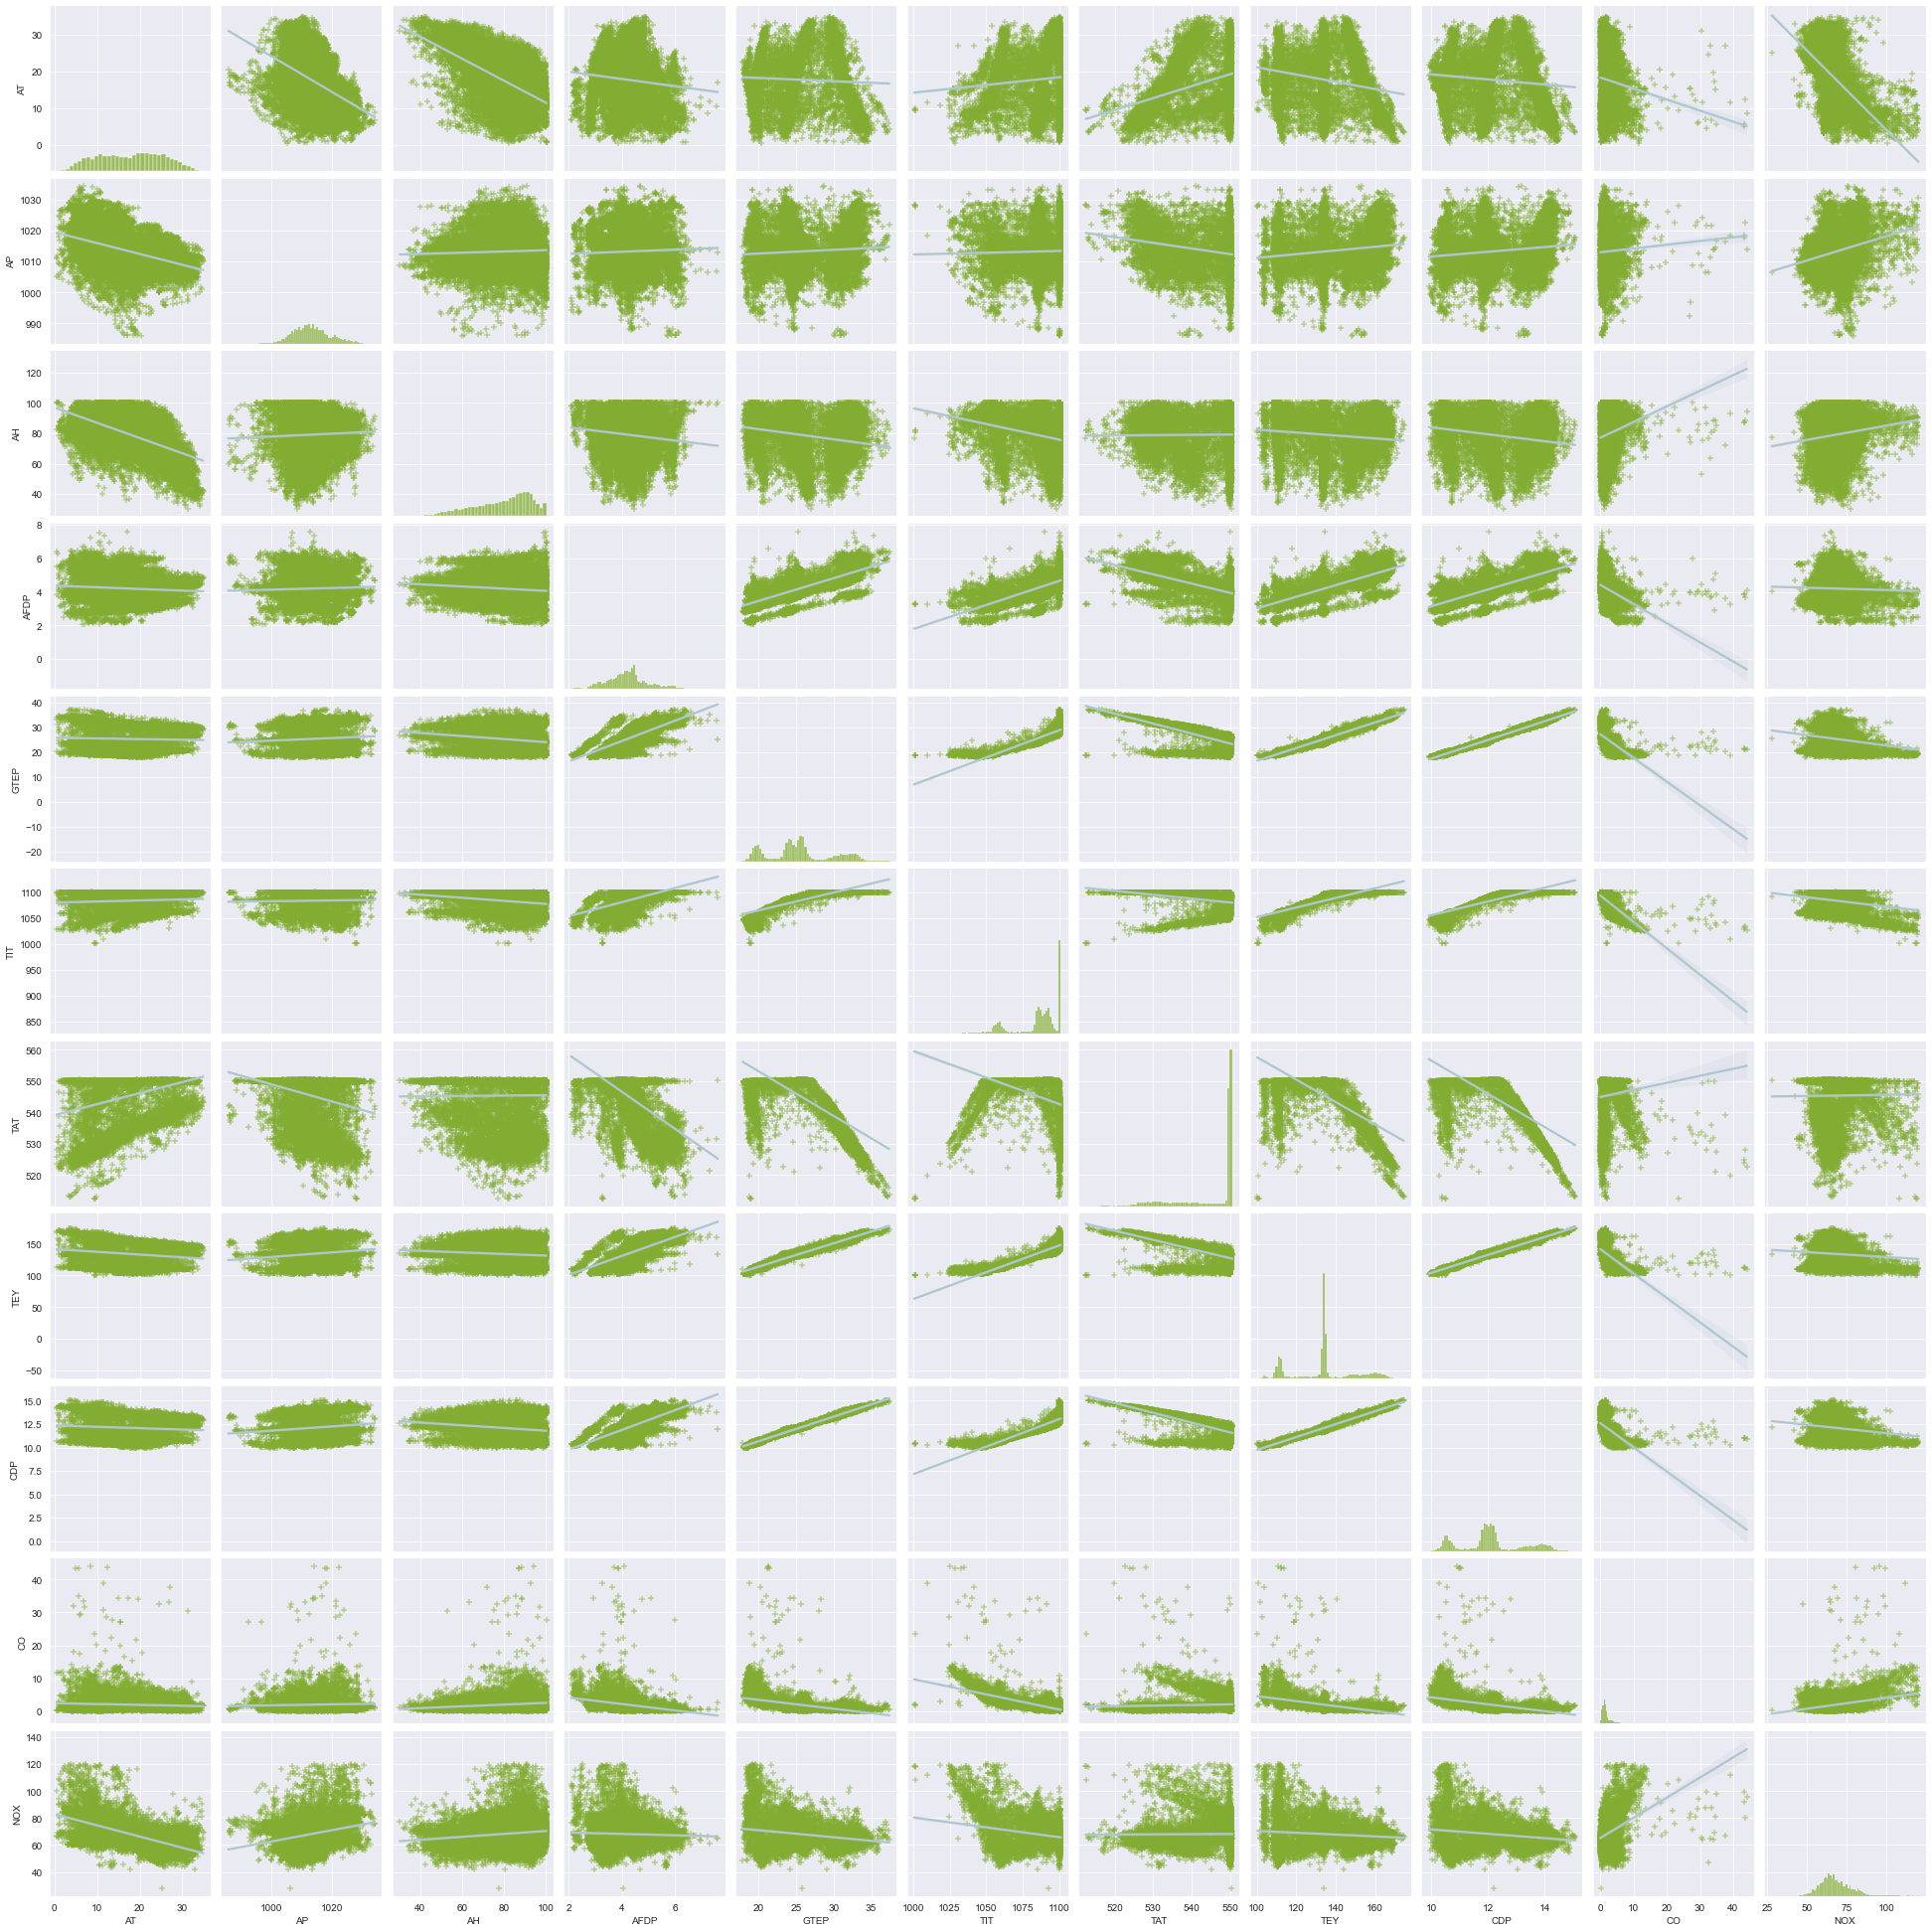

In [30]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})
plt.show()

<Figure size 1440x1440 with 0 Axes>

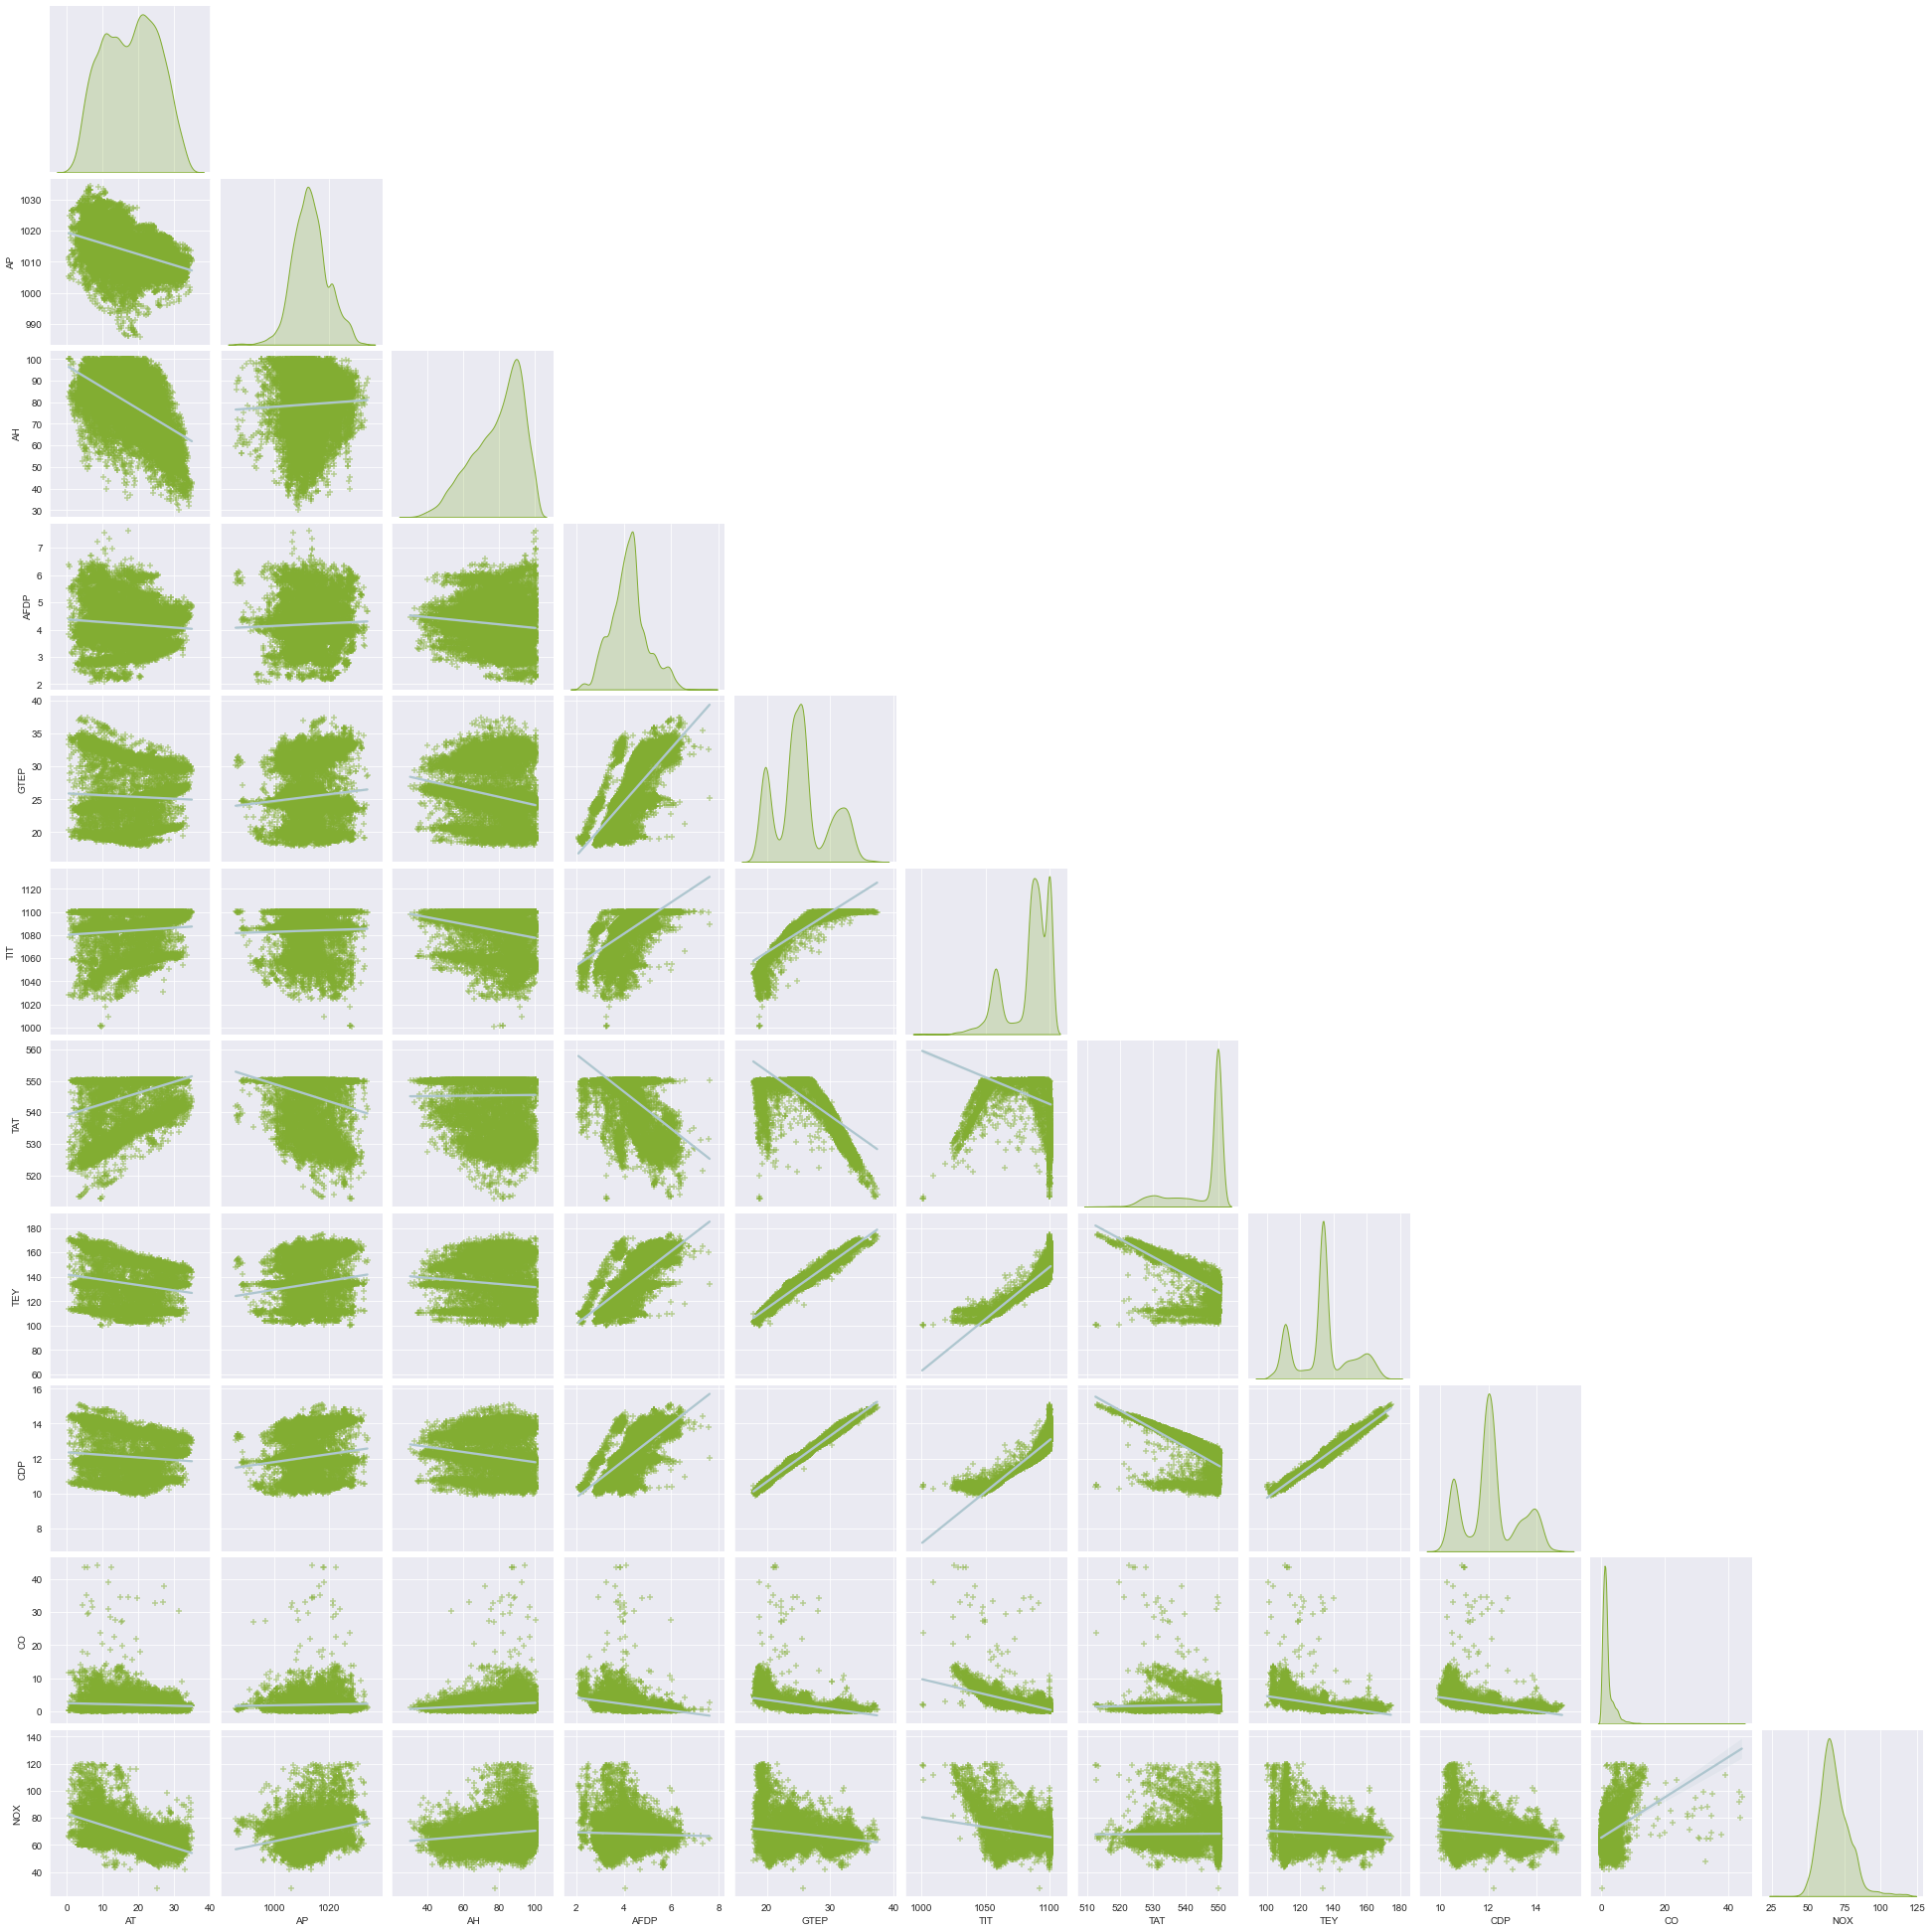

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})
plt.show()

##### Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

C:\Users\sivas\AppData\Local\Temp/ipykernel_21720/3160033449.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

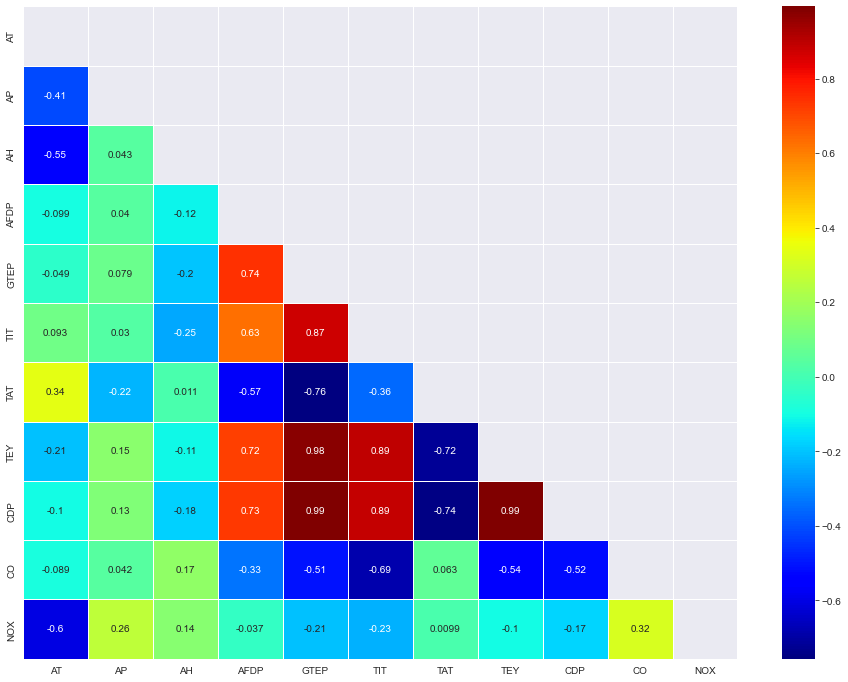

In [32]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [33]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

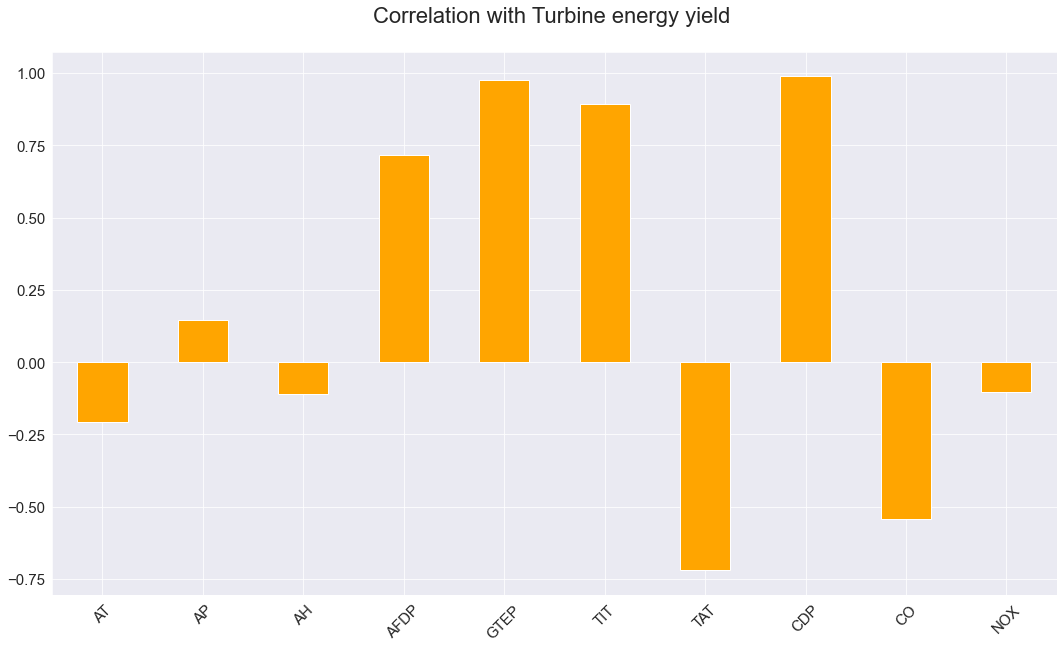

In [34]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

###  Feature Selection Technique

In [35]:
#Feature importance
from numpy import set_printoptions

In [36]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

C:\Users\sivas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [38]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712509,CDP
4,1.600112,GTEP
5,1.322913,TIT
6,0.893838,TAT
3,0.660523,AFDP
8,0.512787,CO
0,0.412682,AT
9,0.300744,NOX
1,0.135973,AP
2,0.097703,AH


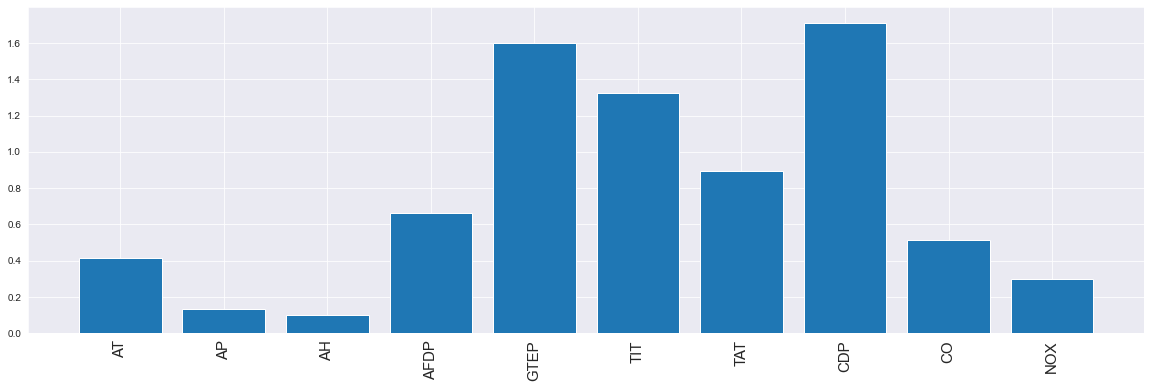

In [39]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

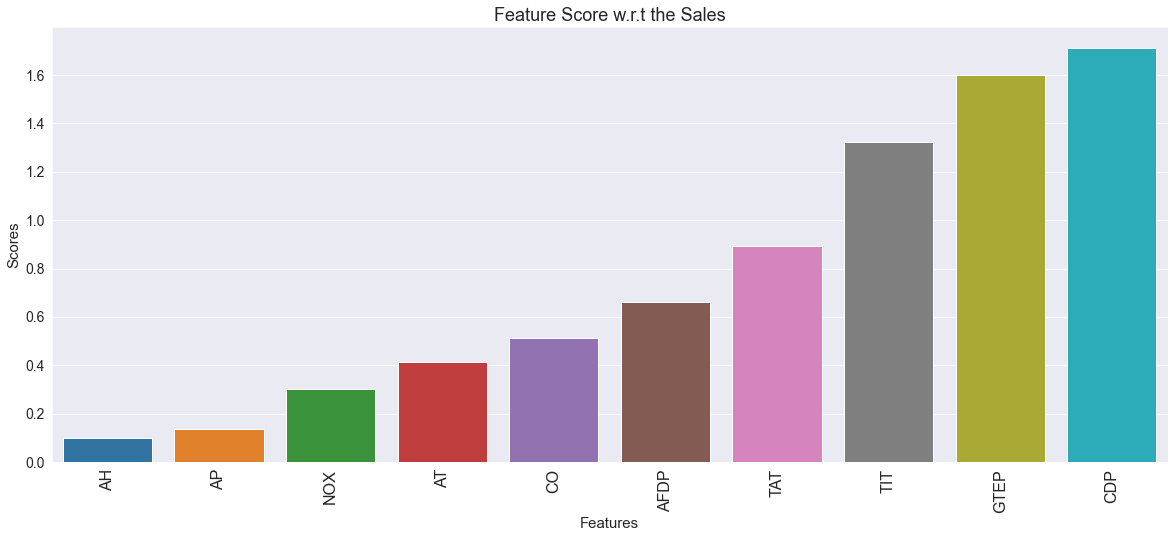

In [40]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [41]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.712509,CDP
4,1.600112,GTEP
5,1.322913,TIT
6,0.893838,TAT
3,0.660523,AFDP
8,0.512787,CO
0,0.412682,AT
9,0.300744,NOX
1,0.135973,AP
2,0.097703,AH


In [42]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


### Data Pre-Processing¶


### Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
Applying Standard Scaler

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [43]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [44]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


#####   Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [46]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [47]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [48]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

### 6. Hyperparameter Tuning
6.1 Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons¶

In [49]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [50]:
!pip install keras-tuner 

In [51]:
import keras_tuner
from tensorflow import keras
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

INFO:tensorflow:Reloading Oracle from existing project project\Gas Turbine\oracle.json
INFO:tensorflow:Reloading Tuner from project\Gas Turbine\tuner0.json


In [52]:
tuner.search_space_summary()

Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [53]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [54]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
Score: 0.023576085766156513
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
Score: 0.02407928618292014
Trial summary
Hyperparameters:
num_layers: 15
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 32
units_5: 64
units_6: 96
units_7: 64
units_8: 96
units_9: 64
units_10: 64
units_11: 64
units_12: 64
units_13: 64
units_14: 64
Score: 0.02408219501376152
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 64
units_4: 32
units_5: 32
units_6: 64
units_7: 96
units_8: 96
units_9: 64
units_10: 64
units_11: 64
units_12: 64
units_13: 64
units_14: 96
Score: 0.024409786487619083
Trial summary
Hyperparameters:
num_layers: 15
units_0: 64
unit

###  6.2 Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [55]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [56]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sivas\AppData\Local\Temp/ipykernel_21720/2023109169.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 =KerasRegressor(build_fn=create_model,verbose=0)


In [57]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.048 total time=  13.6s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.051 total time=   7.7s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.071 total time=   8.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.081 total time=   6.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.033 total time=   6.0s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [58]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.02999829538166523, using {'batch_size': 20, 'epochs': 200}
-0.05689002498984337,0.01734121272467101 with {'batch_size': 10, 'epochs': 10}
-0.0342986561357975,0.0047192722404599844 with {'batch_size': 10, 'epochs': 50}
-0.03242489583790302,0.005521878201214151 with {'batch_size': 10, 'epochs': 100}
-0.03155538290739059,0.004645756009960055 with {'batch_size': 10, 'epochs': 200}
-0.04643362313508988,0.013556396431291706 with {'batch_size': 20, 'epochs': 10}
-0.034505249187350276,0.004065844955486741 with {'batch_size': 20, 'epochs': 50}
-0.031223417073488236,0.003874515572938405 with {'batch_size': 20, 'epochs': 100}
-0.02999829538166523,0.003810915789392986 with {'batch_size': 20, 'epochs': 200}
-0.04018456935882568,0.00789391522687062 with {'batch_size': 40, 'epochs': 10}
-0.03428081721067429,0.005286850648820968 with {'batch_size': 40, 'epochs': 50}
-0.03335629627108574,0.004040997543715594 with {'batch_size': 40, 'epochs': 100}
-0.03121657036244869,0.0016643484676455704 with 

### Hyperparameter Tuning: Optimal Droupout rate

In [59]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [60]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sivas\AppData\Local\Temp/ipykernel_21720/3312514171.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)


In [62]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.037 total time=  24.3s
[CV 2/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.028 total time=  24.8s
[CV 3/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.033 total time=  22.8s
[CV 4/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time=  23.0s
[CV 5/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time=  25.1s
[CV 1/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/6] END ............dropout_rate=0.1;, score=-0.027 total time=  24.0s
[CV 2/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/6] END ............dropout_rate=0.1;, score=-0.028 total time=  24.4s
[CV 3/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/6] END ............dropout_rate=0.1;, score=-0.027 total time=  22.8s
[CV 4/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/6] END ............dropout_rate=0.1;, score=-0.026 total time=  23.9s
[CV 5/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/6] END ............dropout_rate=0.1;, score=-0.029 total time=  24.3s
[CV 1/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/6] END ............dropout_rate=0.2;, score=-0.028 total time=  25.8s
[CV 2/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/6] END ............dropout_rate=0.2;, score=-0.029 total time=  24.0s
[CV 3/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/6] END ............dropout_rate=0.2;, score=-0.031 total time=  23.7s
[CV 4/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/6] END ............dropout_rate=0.2;, score=-0.033 total time=  23.5s
[CV 5/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/6] END ............dropout_rate=0.2;, score=-0.029 total time=  23.9s
[CV 1/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/6] END ............dropout_rate=0.3;, score=-0.036 total time=  24.3s
[CV 2/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/6] END ............dropout_rate=0.3;, score=-0.027 total time=  23.7s
[CV 3/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/6] END ............dropout_rate=0.3;, score=-0.031 total time=  22.1s
[CV 4/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/6] END ............dropout_rate=0.3;, score=-0.033 total time=  23.8s
[CV 5/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/6] END ............dropout_rate=0.3;, score=-0.028 total time=  24.9s
[CV 1/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/6] END ............dropout_rate=0.4;, score=-0.032 total time=  24.2s
[CV 2/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/6] END ............dropout_rate=0.4;, score=-0.027 total time=  25.2s
[CV 3/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/6] END ............dropout_rate=0.4;, score=-0.033 total time=  24.4s
[CV 4/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/6] END ............dropout_rate=0.4;, score=-0.033 total time=  26.0s
[CV 5/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/6] END ............dropout_rate=0.4;, score=-0.028 total time=  23.0s
[CV 1/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/6] END ............dropout_rate=0.5;, score=-0.035 total time=  27.1s
[CV 2/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/6] END ............dropout_rate=0.5;, score=-0.034 total time=  24.3s
[CV 3/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/6] END ............dropout_rate=0.5;, score=-0.028 total time=  24.1s
[CV 4/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/6] END ............dropout_rate=0.5;, score=-0.027 total time=  22.1s
[CV 5/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/6] END ............dropout_rate=0.5;, score=-0.027 total time=  25.7s


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.027368423342704774, using {'dropout_rate': 0.1}
-0.03040620796382427,0.003803503971609072 with {'dropout_rate': 0.0}
-0.027368423342704774,0.0011105334505562244 with {'dropout_rate': 0.1}
-0.029920524358749388,0.0019740426518742972 with {'dropout_rate': 0.2}
-0.03096144050359726,0.0031500176343128646 with {'dropout_rate': 0.3}
-0.030827485769987107,0.0024871301956371477 with {'dropout_rate': 0.4}
-0.030322859808802605,0.0037255764117096893 with {'dropout_rate': 0.5}


### Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [64]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [65]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sivas\AppData\Local\Temp/ipykernel_21720/998694478.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)


In [66]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.708 total time=  44.0s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.752 total time=  44.3s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.698 total time=  44.0s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.753 total time=  42.5s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.717 total time=  41.0s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.761 total time=  42.4s
[CV 2/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.858 total time=  42.9s
[CV 3/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.824 total time=  44.2s
[CV 4/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.906 total time=  43.1s
[CV 5/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.880 total time=  42.4s
[CV 1/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END activation_function=softmax, init=zero;, score=-0.841 total time=  44.4s
[CV 2/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END activation_function=softmax, init=zero;, score=-0.715 total time=  44.0s
[CV 3/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END activation_function=softmax, init=zero;, score=-0.736 total time=  43.5s
[CV 4/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END activation_function=softmax, init=zero;, score=-0.795 total time=  43.3s
[CV 5/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END activation_function=softmax, init=zero;, score=-0.854 total time=  42.3s
[CV 1/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END activation_function=tanh, init=normal;, score=-0.760 total time=  42.0s
[CV 2/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END activation_function=tanh, init=normal;, score=-0.816 total time=  44.8s
[CV 3/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END activation_function=tanh, init=normal;, score=-0.871 total time=  42.5s
[CV 4/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END activation_function=tanh, init=normal;, score=-0.898 total time=  42.6s
[CV 5/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END activation_function=tanh, init=normal;, score=-0.652 total time=  43.9s
[CV 1/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.756 total time=  43.5s
[CV 2/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.732 total time=  42.7s
[CV 3/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.806 total time=  45.0s
[CV 4/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.850 total time=  42.1s
[CV 5/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.671 total time=  43.4s
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=-0.311 total time=  42.3s
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=-0.765 total time=  44.9s
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=-0.766 total time=  48.3s
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=-0.736 total time=  52.0s
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=-0.923 total time=  45.7s
[CV 1/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END activation_function=relu, init=normal;, score=-0.821 total time=  47.9s
[CV 2/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END activation_function=relu, init=normal;, score=-0.695 total time=  43.5s
[CV 3/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END activation_function=relu, init=normal;, score=-0.607 total time=  44.8s
[CV 4/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END activation_function=relu, init=normal;, score=-0.839 total time=  44.2s
[CV 5/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END activation_function=relu, init=normal;, score=-0.725 total time=  43.6s
[CV 1/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END activation_function=relu, init=uniform;, score=-0.736 total time=  44.1s
[CV 2/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END activation_function=relu, init=uniform;, score=-0.647 total time=  45.4s
[CV 3/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END activation_function=relu, init=uniform;, score=-0.758 total time=  44.9s
[CV 4/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END activation_function=relu, init=uniform;, score=-0.863 total time=  43.8s
[CV 5/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END activation_function=relu, init=uniform;, score=-0.705 total time=  46.5s
[CV 1/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END activation_function=relu, init=zero;, score=-0.730 total time=  44.3s
[CV 2/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END activation_function=relu, init=zero;, score=-0.696 total time=  44.3s
[CV 3/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END activation_function=relu, init=zero;, score=-0.767 total time=  45.8s
[CV 4/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END activation_function=relu, init=zero;, score=-0.885 total time=  44.3s
[CV 5/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END activation_function=relu, init=zero;, score=-0.863 total time=  44.5s


C:\Users\sivas\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.7000805735588074, using {'activation_function': 'tanh', 'init': 'zero'}
-0.7255042791366577,0.022752101598593973 with {'activation_function': 'softmax', 'init': 'normal'}
-0.8458814859390259,0.05039760013820891 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.7882461905479431,0.05497394538285879 with {'activation_function': 'softmax', 'init': 'zero'}
-0.7993765592575073,0.08773748710373765 with {'activation_function': 'tanh', 'init': 'normal'}
-0.7630624294281005,0.06123041822510052 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.7000805735588074,0.20515620996517775 with {'activation_function': 'tanh', 'init': 'zero'}
-0.7373955249786377,0.08526975111929617 with {'activation_function': 'relu', 'init': 'normal'}
-0.7416651964187622,0.07115650240343221 with {'activation_function': 'relu', 'init': 'uniform'}
-0.7881500363349915,0.07368060007982975 with {'activation_function': 'relu', 'init': 'zero'}


### 7. Model Building Neural Networks
Standardizing only predictor variable - after train test split

In [68]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [69]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [70]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 17658.9238 - mae: 131.9311 - mse: 17658.9238 - val_loss: 16830.7969 - val_mae: 128.7745 - val_mse: 16830.7969
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 16335.3633 - mae: 126.8171 - mse: 16335.3633 - val_loss: 15779.1270 - val_mae: 124.6239 - val_mse: 15779.1270
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 15360.6230 - mae: 122.9121 - mse: 15360.6230 - val_loss: 14860.7598 - val_mae: 120.8833 - val_mse: 14860.7598
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 14475.8018 - mae: 119.2583 - mse: 14475.8018 - val_loss: 14007.9229 - val_mae: 117.3028 - val_mse: 14007.9229
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 13646.2598 - mae: 115.7328 - mse: 13646.2598 - val_loss: 13202.7920 - val_mae: 113.8192 - val_mse: 13202.7920
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 

In [71]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 3s 616us/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.761359
dtype: float64
94/94 [==============================] - 0s 717us/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.495074
dtype: float64
94/94 [==============================] - 0s 677us/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.609593
dtype: float64
94/94 [==============================] - 0s 783us/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.6079
dtype: float64
94/94 [==============================] - 0s 634us/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.036697
dtype: float64
94/94 [==============================] - 0s 683us/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.32339
dtype: float64
94/94 [==============================] - 0s 673us/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.601043
dtype: float64
94/94 [==============================] - 0s 933us/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.600158
dtype: float64
94/94 [

,batchsize,epochs,Accuracy
0,5,5,TEY 97.761359 dtype: float64
0,5,10,TEY 99.495074 dtype: float64
0,5,50,TEY 99.609593 dtype: float64
0,5,100,TEY 99.6079 dtype: float64
0,10,5,TEY 81.036697 dtype: float64
0,10,10,TEY 98.32339 dtype: float64
0,10,50,TEY 99.601043 dtype: float64
0,10,100,TEY 99.600158 dtype: float64
0,15,5,TEY 58.809202 dtype: float64
0,15,10,TEY 89.803379 dtype: float64


###  Training Model - using best params

In [73]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

### Model Evaluation Train and Test Error

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Error', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

###  Predicting values from Model using same dataset

In [75]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.422363
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.599724
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,133.974304
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.800613
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.230621
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.217117
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.594833
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,128.914902
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.302979
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,160.738159


In [ ]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

###  Calculating Absolute Percent Error and Error

In [81]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.6868563428639


,Actual,Predicted,APE %
13312,134.46,134.422363,0.027991
12627,111.88,112.599724,0.643300
6393,133.72,133.974304,0.190177
4990,133.79,133.800613,0.007933
12462,110.77,111.230621,0.415836


In [82]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.422363,0.027991,0.000280
1,111.88,112.599724,0.643300,-0.006433
2,133.72,133.974304,0.190177,-0.001902
3,133.79,133.800613,0.007933,-0.000079
4,110.77,111.230621,0.415836,-0.004158
...,...,...,...,...
3003,119.25,119.732941,0.404982,-0.004050
3004,133.74,133.744766,0.003564,-0.000036
3005,146.31,146.445038,0.092296,-0.000923
3006,150.07,149.068848,0.667124,0.006671


###  Visualizing the Relationship between the Actual and Predicted ValuesModel Validation¶

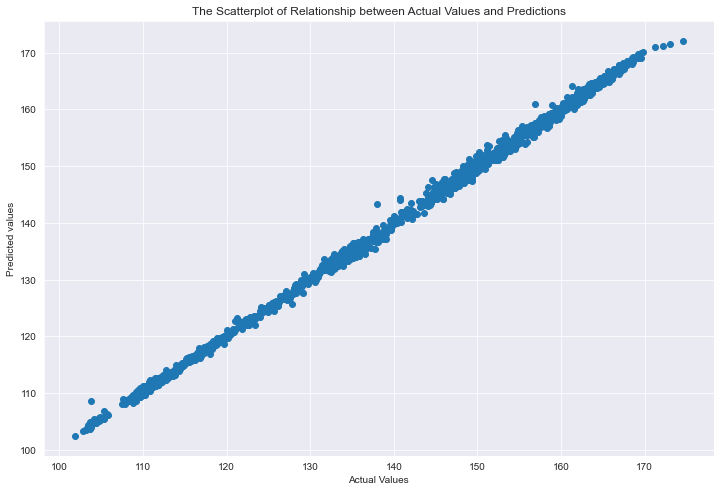

In [84]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [85]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.4173927076826706
MSE: 0.33036415222147403
RMSE: 0.5747731310886706


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.9985912811563198
R2_score (test):  0.998680599638167


In [87]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.87 of the target correctly


### Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

C:\Users\sivas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

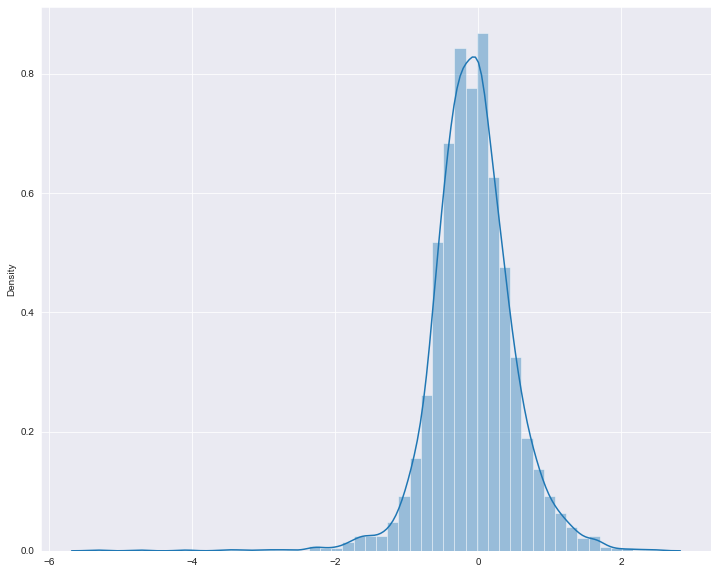

In [88]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

C:\Users\sivas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


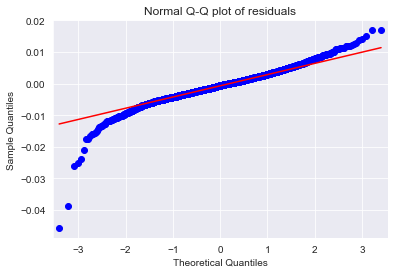

In [89]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()